In [1]:
import database as db
import pandas as pd
import numpy as np
import data_visuals as dv
import matplotlib.pyplot as plt
import rating_predictor as rp


### Data Histogram

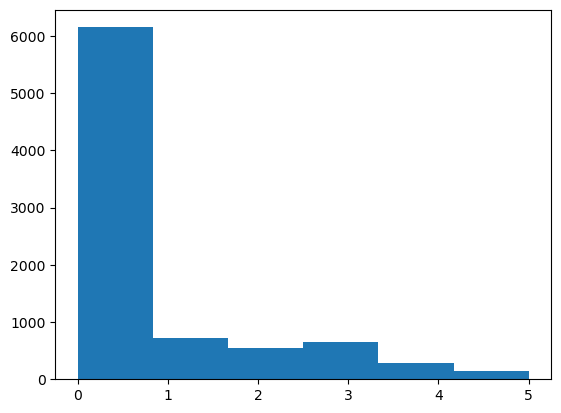

In [2]:
apba = db.load_all_apba()
dv.data_histogram(apba, 'RateFaceoff', 6)

# Data Analysis
Key Details we have available:
- Number of faceoffs
- Facoff Pct. (Faceoffs won / Faceoffs taken)

Remember the first step

In [18]:
rp.ci_face_off_rating(55, 95, 73)

0.33527802942590157

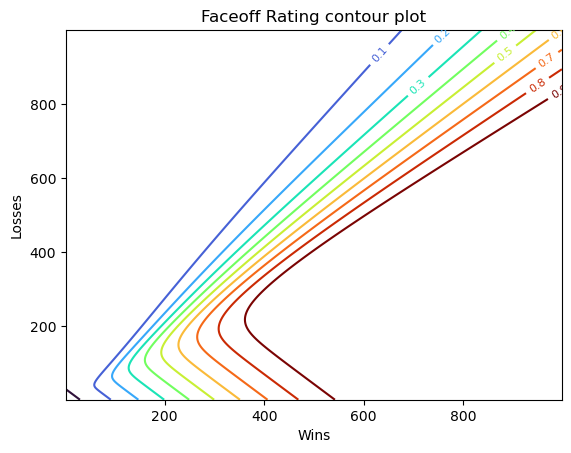

In [6]:
wins = np.arange(1, 1000, 1)
losses = np.arange(1, 1000, 1)

W, L = np.meshgrid(wins, losses)
RATING = rp.ci_face_off_rating(82, W, L)

contour_plot = plt.contour(W, L, RATING, np.arange(0, 1, 0.1), cmap='turbo')

plt.clabel(contour_plot, inline=True, fontsize=8)

plt.xlabel('Wins')
plt.ylabel('Losses')
plt.title('Faceoff Rating contour plot')

plt.show()


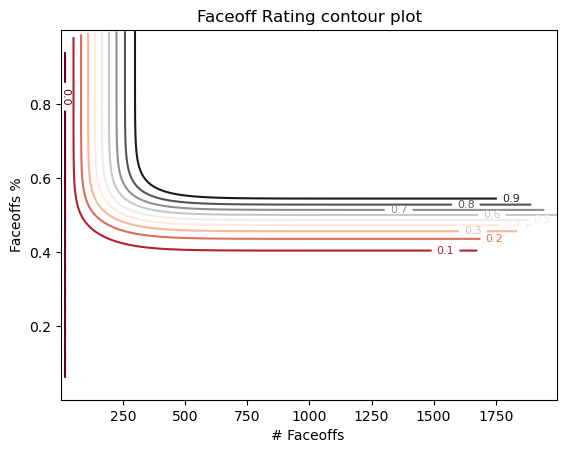

In [8]:
wins = np.arange(1, 1000, 1)
losses = np.arange(1, 1000, 1)

W, L = np.meshgrid(wins, losses)
RATING = rp.ci_face_off_rating(82, W, L)

contour_plot = plt.contour(W + L, W/(W+L), RATING, np.arange(0, 1, 0.1), cmap='RdGy')

plt.clabel(contour_plot, inline=True, fontsize=8)

plt.xlabel('# Faceoffs ')
plt.ylabel('Faceoffs %')
plt.title('Faceoff Rating contour plot')

plt.show()

Now we can see how this works on real data from the previous season


In [9]:
player_data_2023 = pd.read_csv('HockeyRef_Data_Files/Hockey-Ref_Player_Data_2022-23.csv')
player_data_2023.head()


,UID,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,TotPPGF,TotGA,TotPPGA,PlusMin,XGF,XGA,XPlusMin,OPS,DPS,TotPS
0,abruzni01,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,1,0,0,1,0.5,0.7,-0.1,0.1,0.1,0.2
1,acciano01,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,0,57,19,-4,37.3,38.9,-1.6,0.5,1.1,1.5
2,addisca01,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,38,48,0,-17,30.9,30.8,0.1,1.9,1.3,3.2
3,afanaeg01,Egor Afanasyev,22.0,NSH,LW,17,1,0,1,-7,...,0,10,0,-7,5.1,7.6,-2.5,-0.3,0.0,-0.3
4,agozzan01,Andrew Agozzino,32.0,SJS,LW,4,1,2,3,-1,...,0,4,0,-1,3.7,2.3,1.4,0.2,0.0,0.2


In [10]:
small = player_data_2023.filter(items=['Player', 'GP', 'FOW', 'FOL'])

In [11]:
small

,Player,GP,FOW,FOL
0,Nicholas Abruzzese,2,0,0
1,Noel Acciari,77,337,289
2,Calen Addison,62,0,0
3,Egor Afanasyev,17,0,0
4,Andrew Agozzino,4,1,0
...,...,...,...,...
946,Mika Zibanejad,82,692,706
947,Radim Zohorna,10,21,20
948,Artem Zub,53,0,0
949,Mats Zuccarello,78,24,36


In [12]:
small['Faceoff Rating'] = round(rp.ci_face_off_rating(small['GP'], small['FOW'], small['FOL']) * 5)

In [13]:
small

,Player,GP,FOW,FOL,Faceoff Rating
0,Nicholas Abruzzese,2,0,0,-0.0
1,Noel Acciari,77,337,289,4.0
2,Calen Addison,62,0,0,-0.0
3,Egor Afanasyev,17,0,0,-0.0
4,Andrew Agozzino,4,1,0,-0.0
...,...,...,...,...,...
946,Mika Zibanejad,82,692,706,3.0
947,Radim Zohorna,10,21,20,2.0
948,Artem Zub,53,0,0,-0.0
949,Mats Zuccarello,78,24,36,0.0


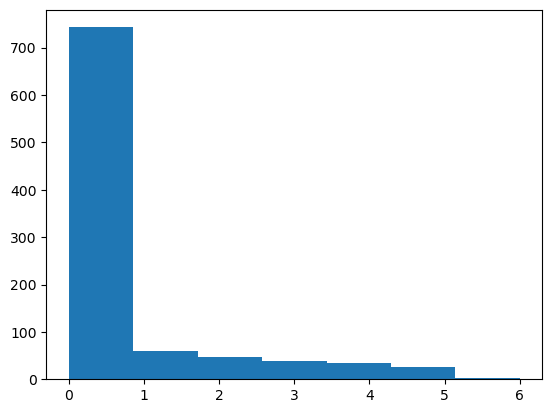

In [14]:
dv.data_histogram(small, 'Faceoff Rating', 7)